<a href="https://colab.research.google.com/github/satanimeet/customerchurn/blob/main/final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.combine import SMOTEENN
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text

In [ ]:
path=('/content/drive/MyDrive/dataset/filter_churn.csv')
data = pd.read_csv(path)
data.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_years_0-1,tenure_years_1-2,tenure_years_2-3,tenure_years_3-4,tenure_years_4-5,tenure_years_5+
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7043 non-null   int64  
 4   gender_Female                            7043 non-null   int64  
 5   gender_Male                              7043 non-null   int64  
 6   Partner_No                               7043 non-null   int64  
 7   Partner_Yes                              7043 non-null   int64  
 8   Dependents_No                            7043 non-null   int64  
 9   Dependents_Yes                           7043 non-null   int64  
 10  PhoneService_No                          7043 no

In [ ]:
data.describe()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_years_0-1,tenure_years_1-2,tenure_years_2-3,tenure_years_3-4,tenure_years_4-5,tenure_years_5+
count,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,64.761692,2283.300441,0.265370,0.495244,0.504756,0.516967,0.483033,0.700412,0.299588,...,0.219225,0.216101,0.335794,0.228880,0.310379,0.145393,0.118131,0.108193,0.118131,0.199773
std,0.368612,30.090047,2266.771362,0.441561,0.500013,0.500013,0.499748,0.499748,0.458110,0.458110,...,0.413751,0.411613,0.472301,0.420141,0.462682,0.352521,0.322787,0.310645,0.322787,0.399858
min,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.shape

(7043, 51)

In [ ]:
x = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
DecisionTree= DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=8)
DecisionTree.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, random_state=100)

In [ ]:
DecisionTree.score(test_x,test_y)

0.898981324278438

In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(DecisionTree, feature_names=list(train_x.columns))
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- Contract_Month-to-month <= 0.00
|   |--- InternetService_Fiber optic <= 0.39
|   |   |--- OnlineSecurity_No <= 0.50
|   |   |   |--- class: 0
|   |   |--- OnlineSecurity_No >  0.50
|   |   |   |--- class: 0
|   |--- InternetService_Fiber optic >  0.39
|   |   |--- tenure_years_5+ <= 0.96
|   |   |   |--- class: 0
|   |   |--- tenure_years_5+ >  0.96
|   |   |   |--- class: 0
|--- Contract_Month-to-month >  0.00
|   |--- OnlineSecurity_No <= 0.00
|   |   |--- TotalCharges <= 37.56
|   |   |   |--- class: 1
|   |   |--- TotalCharges >  37.56
|   |   |   |--- class: 0
|   |--- OnlineSecurity_No >  0.00
|   |   |--- TechSupport_Yes <= 1.00
|   |   |   |--- class: 1
|   |   |--- TechSupport_Yes >  1.00
|   |   |   |--- class: 1



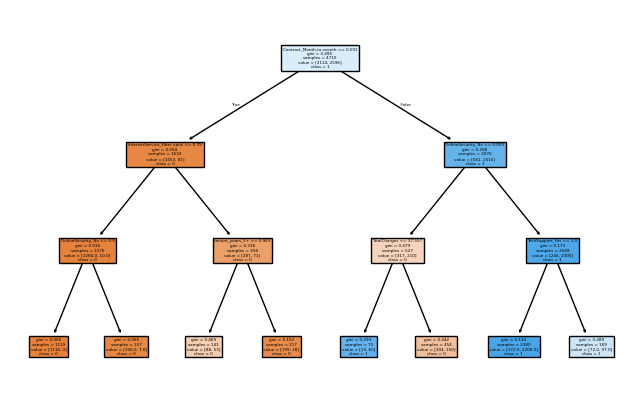

In [ ]:
plt.figure(figsize=(8, 5))
plot_tree(DecisionTree, filled=True, feature_names=list(train_x.columns), class_names=['0', '1'])
plt.show()

In [ ]:
y_pred=DecisionTree.predict(test_x)

In [ ]:
print(classification_report(test_y, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1036
           1       0.62      0.64      0.63       373

    accuracy                           0.80      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.80      0.80      0.80      1409



In [ ]:
hgb_classifier = HistGradientBoostingClassifier(random_state=42)
hgb_classifier.fit(train_x, train_y)
y_pred = hgb_classifier.predict(test_x)
print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(accuracy_score(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       541
           1       0.96      0.97      0.96       637

    accuracy                           0.96      1178
   macro avg       0.96      0.96      0.96      1178
weighted avg       0.96      0.96      0.96      1178

[[514  27]
 [ 22 615]]
0.9584040747028862


In [ ]:
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

x_imputed = pd.DataFrame(x_imputed, columns=x.columns)


smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(x_imputed, y)


print(pd.Series(y_resampled).value_counts())

train_x, test_x, train_y, test_y = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)




random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(train_x, train_y)
y_pred = random_forest.predict(test_x)

print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(accuracy_score(test_y, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Churn
1    3233
0    2655
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       541
           1       0.95      0.96      0.95       637

    accuracy                           0.95      1178
   macro avg       0.95      0.95      0.95      1178
weighted avg       0.95      0.95      0.95      1178

[[507  34]
 [ 24 613]]
0.9507640067911715
